# Los Angeles Crime Data Analysis


### Below are all the variables in the dataset, followed by its description:
DR_NO -  Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits.

DATE OCC - Date of crime occurrence(YYYY-MM-DD)
 
AREA - The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21.
 
AREA NAME - The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for.

Rpt Dist No - Code that represents a sub-area within a Geographic Area.

Crm Cd - Indicates the crime committed.

Crm Cd Desc - Defines the Crime Code provided.
 
Vict Age - Indicates the age of the victim.

Vict Sex - F: Female M: Male X: Unknown

Vict Descent - Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian
Premis Cd - The type of structure, vehicle, or location where the crime took place.
Premis Desc - Defines the Premise Code provided.
Weapon Used Cd - The type of weapon used in the crime.
Weapon Desc - Defines the Weapon Used Code provided.
LOCATION - Street address of crime incident rounded to the nearest hundred block to maintain anonymity.
LAT - Latitude Coordinate.
LON - Longitude Coordinate. 

### resource: https://medium.com/analytics-vidhya/los-angeles-crime-data-analysis-using-pandas-a68780d80a83


In [28]:
# importing libraries and file from google drive

# for some basic operations
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import folium
!pip install squarify
import squarify

# dataset download link: https://catalog.data.gov/dataset/crime-data-from-2020-to-present

#import the dataset and lets see the 5 rows
df = pd.read_csv('https://data.lacity.org/api/views/2nrs-mtv8/rows.csv?accessType=DOWNLOAD')
df.tail()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
369317,211208872,03/19/2021 12:00:00 AM,03/19/2021 12:00:00 AM,1105,12,77th Street,1218,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,58TH ST,FIGUEROA ST,33.9897,-118.2827
369318,210506531,03/04/2021 12:00:00 AM,03/04/2021 12:00:00 AM,2210,5,Harbor,564,2,434,FALSE IMPRISONMENT,...,AA,Adult Arrest,434.0,NaN,NaN,NaN,200 W 2ND ST,NaN,33.7424,-118.2814
369319,210217231,11/06/2021 12:00:00 AM,11/05/2021 12:00:00 AM,2300,2,Rampart,235,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,2300 MIRAMAR ST,NaN,34.0649,-118.2741
369320,210312887,07/12/2021 12:00:00 AM,07/12/2021 12:00:00 AM,1200,3,Southwest,363,1,350,"THEFT, PERSON",...,IC,Invest Cont,350.0,NaN,NaN,NaN,CRENSHAW BL,STOCKER ST,34.0088,-118.3351
369321,212005847,02/22/2021 12:00:00 AM,02/22/2021 12:00:00 AM,1200,20,Olympic,2034,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,3300 W 8TH ST,NaN,34.0596,-118.3022


## Here we display the number of columns 

In [31]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [32]:
#Data Frame Volume and Data Types
print('Rows:\t{}'.format(df.shape[0]))
print('Variables:\t{}'.format(df.shape[1]))
df.dtypes


Rows:	369322
Variables:	28


DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

## Missing Values Percentage

In [33]:
(df.isnull().sum()).sort_values(ascending=False) / df.shape[0]

Crm Cd 4          0.999905
Crm Cd 3          0.997268
Crm Cd 2          0.919279
Cross Street      0.822345
Weapon Used Cd    0.635126
Weapon Desc       0.635126
Mocodes           0.137335
Vict Descent      0.131354
Vict Sex          0.131341
Premis Desc       0.000338
Premis Cd         0.000011
Crm Cd 1          0.000008
LAT               0.000000
LOCATION          0.000000
Status Desc       0.000000
Status            0.000000
DR_NO             0.000000
Date Rptd         0.000000
Vict Age          0.000000
Crm Cd Desc       0.000000
Crm Cd            0.000000
Part 1-2          0.000000
Rpt Dist No       0.000000
AREA NAME         0.000000
AREA              0.000000
TIME OCC          0.000000
DATE OCC          0.000000
LON               0.000000
dtype: float64

## Dropping the unwanted columns 

In [34]:
#df.drop(['Date Rptd','Crm Cd 4','Crm Cd 3','Crm Cd 2','Cross Street'],axis=1,inplace=True)

In [35]:
# removing blank values for 'Vict Descent', 'Vict Sex' and 'Premis Desc'
df.dropna(subset=['Vict Descent', 'Vict Sex', 'Premis Desc'],inplace=True)
# adding the "N/A" text on blank values for 'Weapon Desc' and 'Weapon Used Cd'
df.fillna(value='N/A')

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,N/A,N/A,N/A,1100 W 39TH PL,N/A,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,N/A,N/A,N/A,700 S HILL ST,N/A,34.0459,-118.2545
2,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,N/A,N/A,5400 CORTEEN PL,N/A,34.1685,-118.4019
3,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,N/A,N/A,N/A,14400 TITUS ST,N/A,34.2198,-118.4468
4,200100501,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,30,1,Central,163,1,121,"RAPE, FORCIBLE",...,IC,Invest Cont,121.0,998.0,N/A,N/A,700 S BROADWAY,N/A,34.0452,-118.2534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369314,212110947,07/04/2021 12:00:00 AM,07/04/2021 12:00:00 AM,2135,21,Topanga,2143,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,N/A,N/A,N/A,23100 FRIAR ST,N/A,34.1855,-118.6296
369315,210712605,08/31/2021 12:00:00 AM,08/28/2021 12:00:00 AM,1603,7,Wilshire,721,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,N/A,N/A,N/A,8700 W 3RD ST,N/A,34.0736,-118.3827
369316,211512994,08/10/2021 12:00:00 AM,08/10/2021 12:00:00 AM,1840,15,N Hollywood,1524,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,AO,Adult Other,626.0,N/A,N/A,N/A,VICTORY,LAUREL CANYON,34.1867,-118.3965
369318,210506531,03/04/2021 12:00:00 AM,03/04/2021 12:00:00 AM,2210,5,Harbor,564,2,434,FALSE IMPRISONMENT,...,AA,Adult Arrest,434.0,N/A,N/A,N/A,200 W 2ND ST,N/A,33.7424,-118.2814


## checking the statistical data for each column

## we got negative victim age thats why we are dropping victim age less than 10

In [36]:
df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,3.206890e+05,320689.000000,320689.000000,320689.000000,320689.000000,320689.000000,320689.000000,320689.000000,134666.000000,320687.000000,29697.000000,1009.000000,35.000000,320689.000000,320689.000000
mean,2.058880e+08,1337.615144,10.718434,1117.991874,1.473362,510.171606,34.579708,320.822074,362.157441,509.852267,955.452167,981.601586,988.514286,33.813394,-117.453199
std,5.040948e+06,650.669091,6.062841,606.264934,0.499291,224.968961,19.634479,213.660862,123.300391,224.747698,115.665920,55.866922,34.534187,2.965881,10.295488
min,1.030447e+07,1.000000,1.000000,101.000000,1.000000,110.000000,-1.000000,101.000000,101.000000,110.000000,210.000000,434.000000,821.000000,0.000000,-118.667600
25%,2.011045e+08,905.000000,6.000000,628.000000,1.000000,330.000000,24.000000,104.000000,308.000000,330.000000,998.000000,998.000000,998.000000,34.010900,-118.431200
50%,2.021052e+08,1415.000000,11.000000,1138.000000,1.000000,440.000000,34.000000,221.000000,400.000000,440.000000,998.000000,998.000000,998.000000,34.057900,-118.323700
75%,2.110131e+08,1855.000000,16.000000,1612.000000,2.000000,740.000000,48.000000,501.000000,400.000000,740.000000,998.000000,998.000000,998.000000,34.161400,-118.274400
max,2.199224e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,99.000000,971.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.334300,0.000000


In [37]:
# removing the values below one for the "Vict Age" column
df.drop(df[df['Vict Age'] < 10].index, axis=0, inplace=True)

## Here are no negative victim age, we got the clean data.

In [38]:
# checking the statistical data for vict age
df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,2.777540e+05,277754.000000,277754.000000,277754.000000,277754.000000,277754.000000,277754.000000,277754.000000,122963.000000,277754.000000,23244.000000,886.000000,34.000000,277754.000000,277754.000000
mean,2.059245e+08,1342.943396,10.763957,1122.554768,1.475651,506.824186,39.888722,321.012259,363.920122,506.519276,949.645887,980.950339,988.235294,33.835168,-117.525565
std,5.045156e+06,648.151274,6.103194,610.203859,0.499408,224.237730,15.308395,214.304042,120.783625,224.017857,123.400651,56.580804,35.013468,2.848660,9.887776
min,1.030447e+07,1.000000,1.000000,101.000000,1.000000,110.000000,10.000000,101.000000,101.000000,110.000000,210.000000,434.000000,821.000000,0.000000,-118.667600
25%,2.011052e+08,915.000000,6.000000,628.000000,1.000000,330.000000,28.000000,102.000000,311.000000,330.000000,998.000000,998.000000,998.000000,34.011100,-118.433500
50%,2.021083e+08,1417.000000,11.000000,1141.000000,1.000000,440.000000,37.000000,242.000000,400.000000,440.000000,998.000000,998.000000,998.000000,34.058200,-118.326600
75%,2.110141e+08,1900.000000,16.000000,1633.000000,2.000000,662.000000,50.000000,502.000000,400.000000,653.000000,998.000000,998.000000,998.000000,34.164900,-118.276100
max,2.199047e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,99.000000,971.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.334300,0.000000


## Here we listed the types of crime 

In [39]:
df['Crm Cd Desc'].value_counts().head(20)

BATTERY - SIMPLE ASSAULT                                    29681
BURGLARY FROM VEHICLE                                       22996
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              21501
INTIMATE PARTNER - SIMPLE ASSAULT                           19805
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     18296
THEFT PLAIN - PETTY ($950 & UNDER)                          17091
BURGLARY                                                    15851
THEFT OF IDENTITY                                           14914
ROBBERY                                                     10714
THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER)            10289
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                     9877
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD     8910
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)              8406
CRIMINAL THREATS - NO WEAPON DISPLAYED                       7584
BRANDISH WEAPON                                              5826
INTIMATE P

   ## Here we plotting the major type of crimes in Los Angles

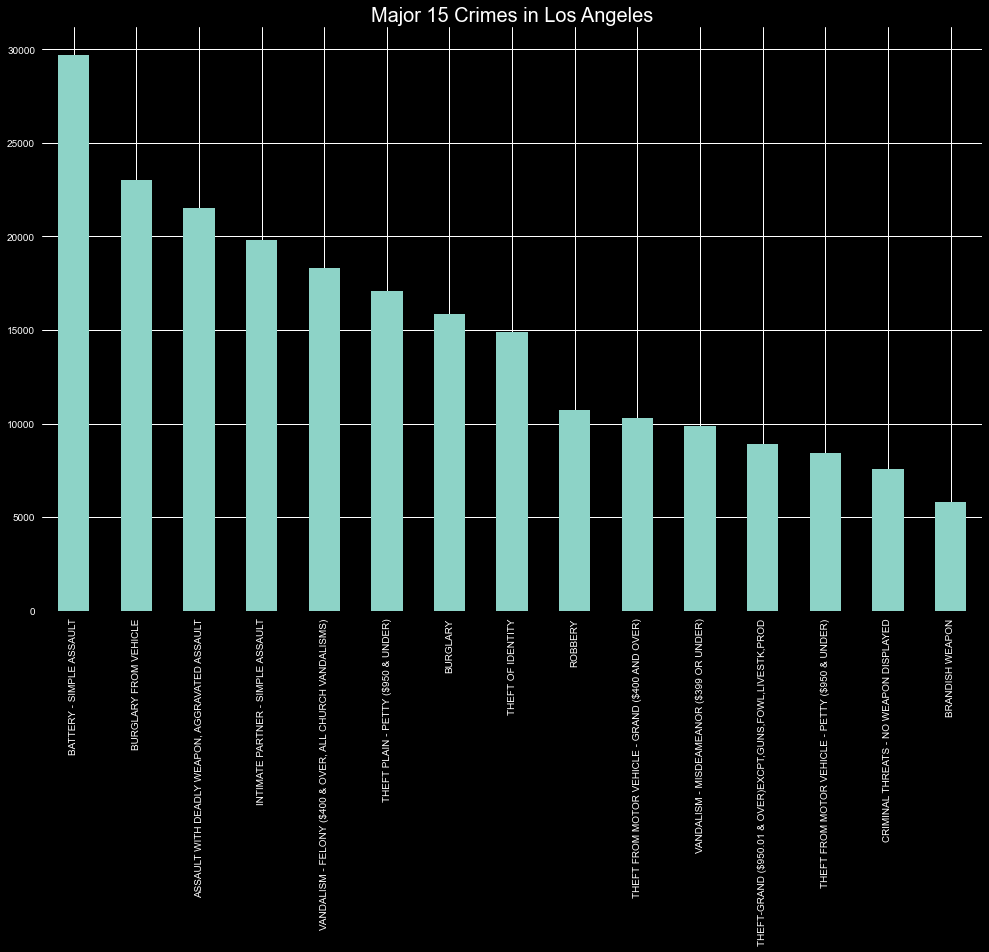

In [40]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

#sns.countplot(df['Crm Cd Desc'])
df['Crm Cd Desc'].value_counts().head(15).plot.bar( figsize = (15, 10))
plt.title('Major 15 Crimes in Los Angeles', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

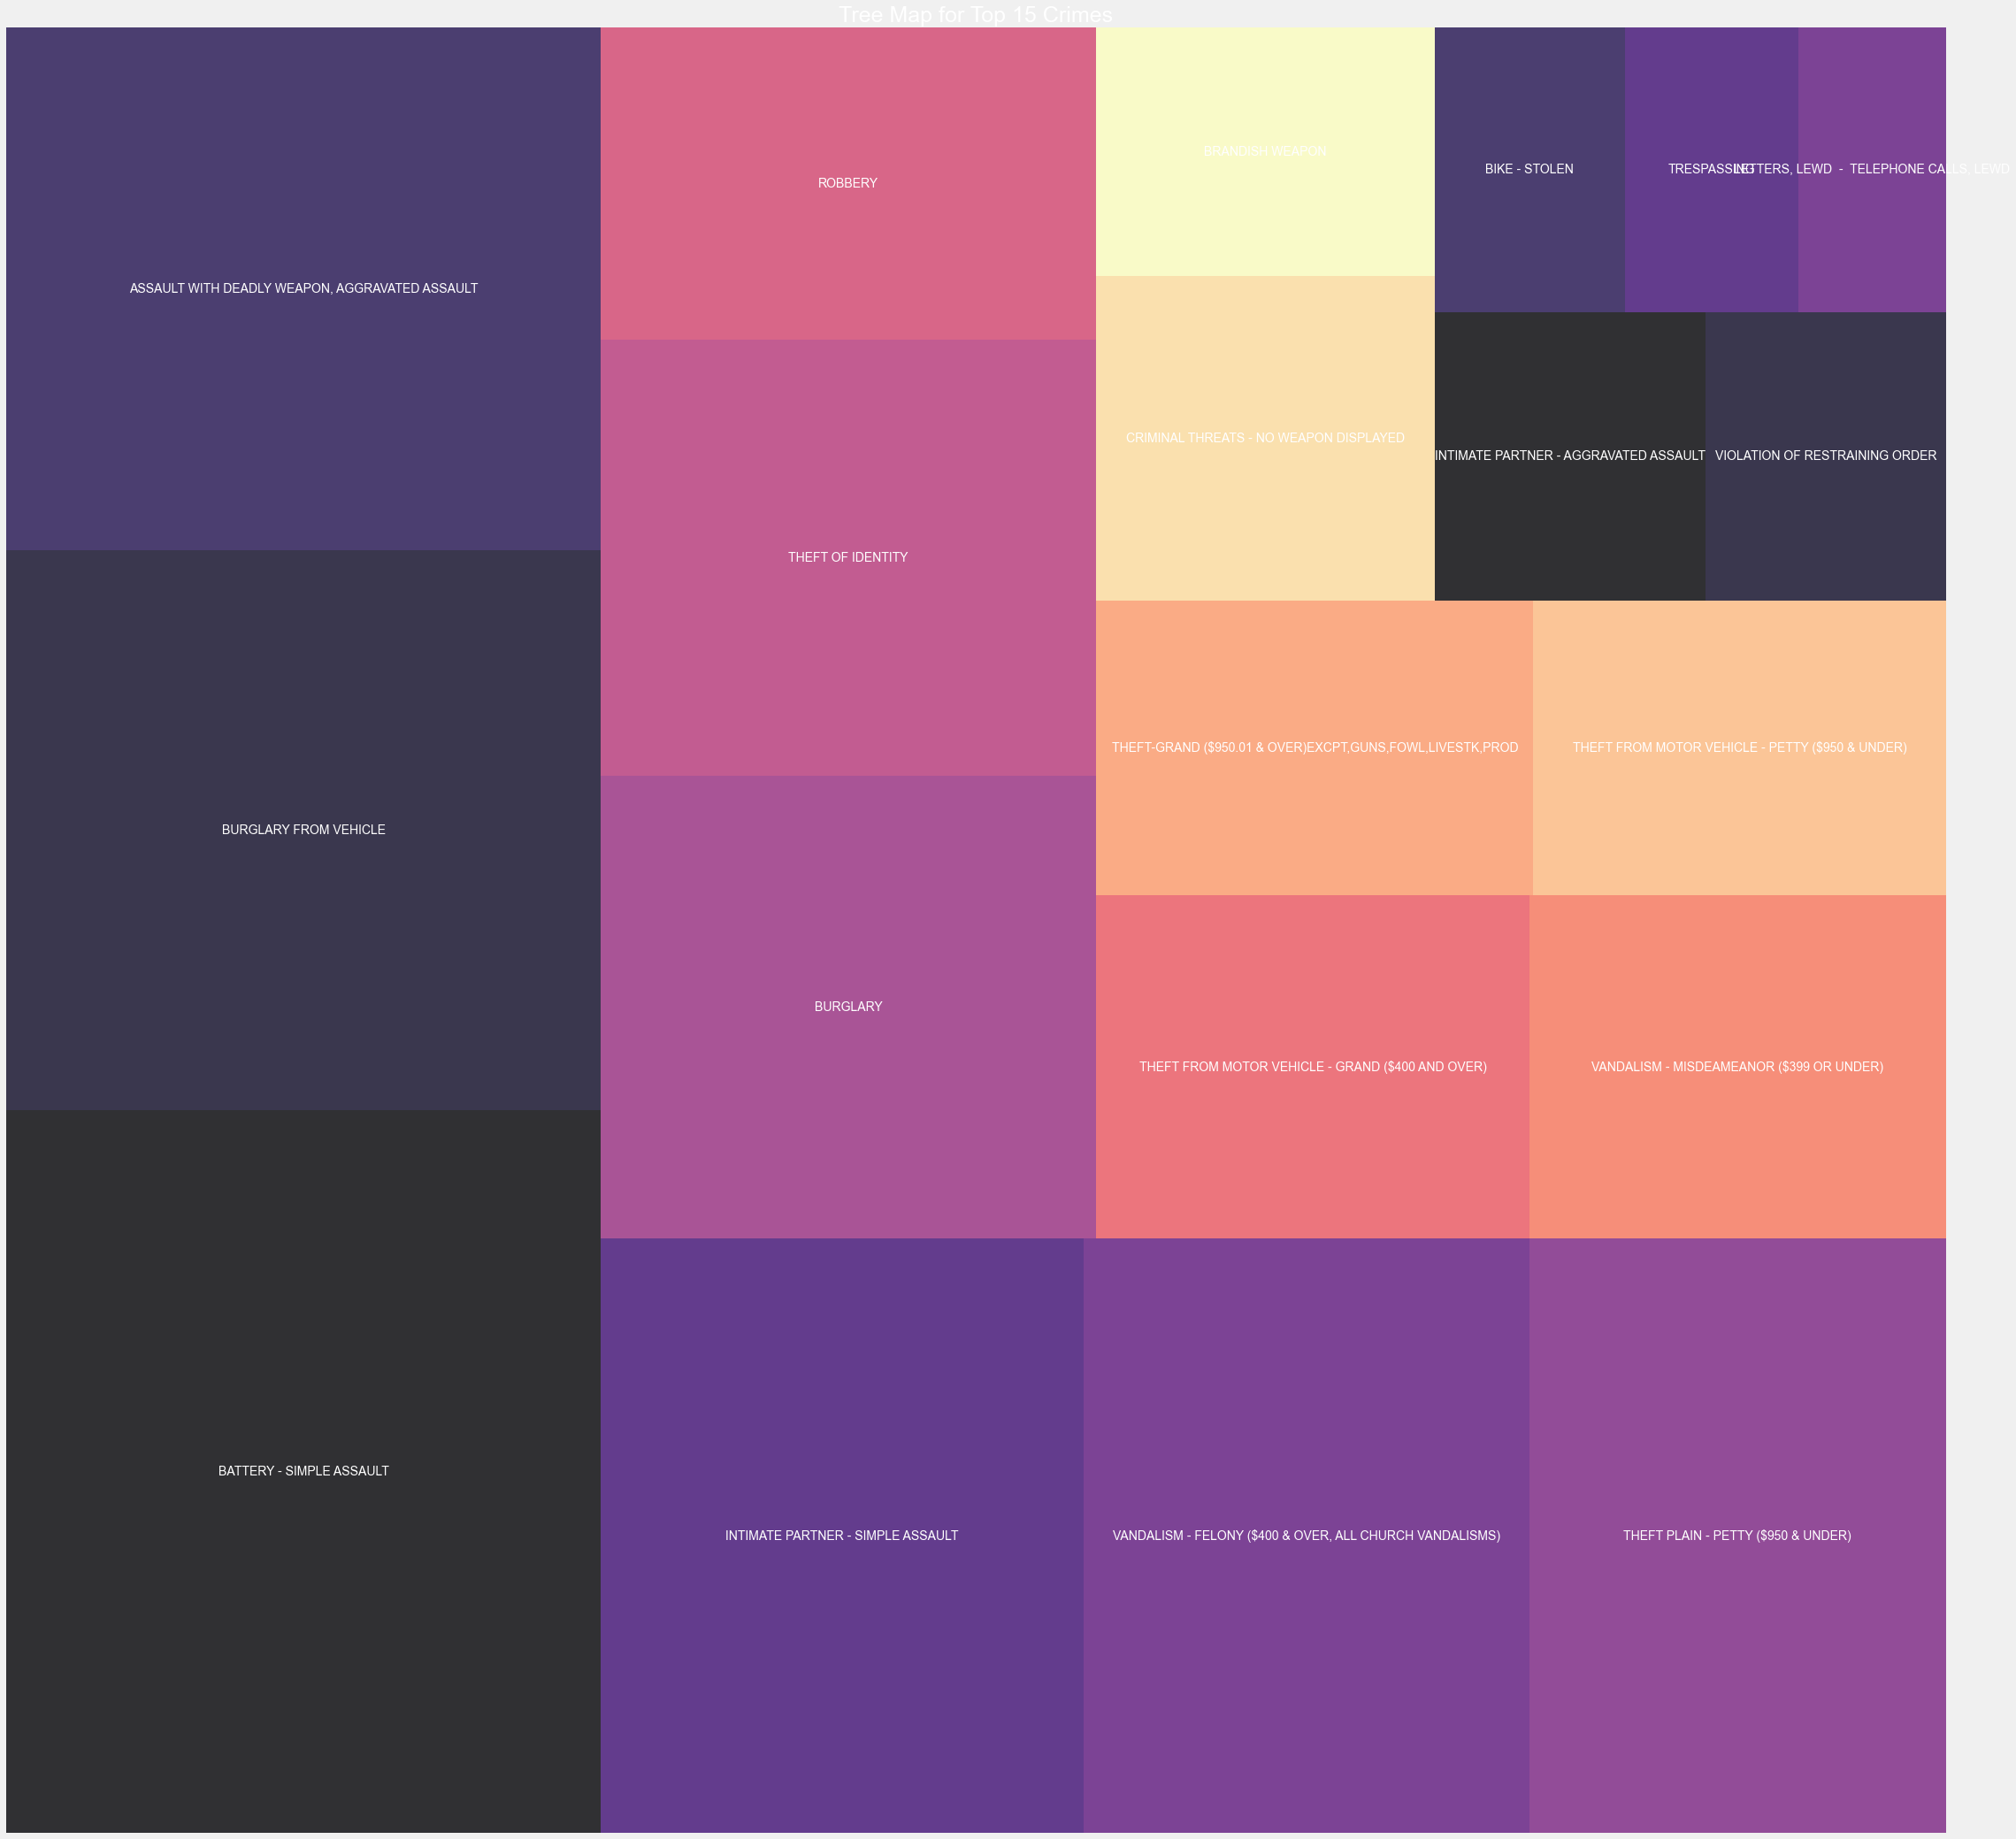

In [41]:
#Plotting a tree map
import numpy as np
y = df['Crm Cd Desc'].value_counts().head(20)
    
plt.rcParams['figure.figsize'] = (35, 35)
plt.style.use('fivethirtyeight')
color = plt.cm.magma(np.linspace(0, 1, 15))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Top 15 Crimes', fontsize = 25)
plt.axis('off')
plt.show()

 ## Here we plotting number of crime cases held in a certain area 

## Hypothesis 1: Can this dataset explain the crime rate in different regions in Los Angeles.

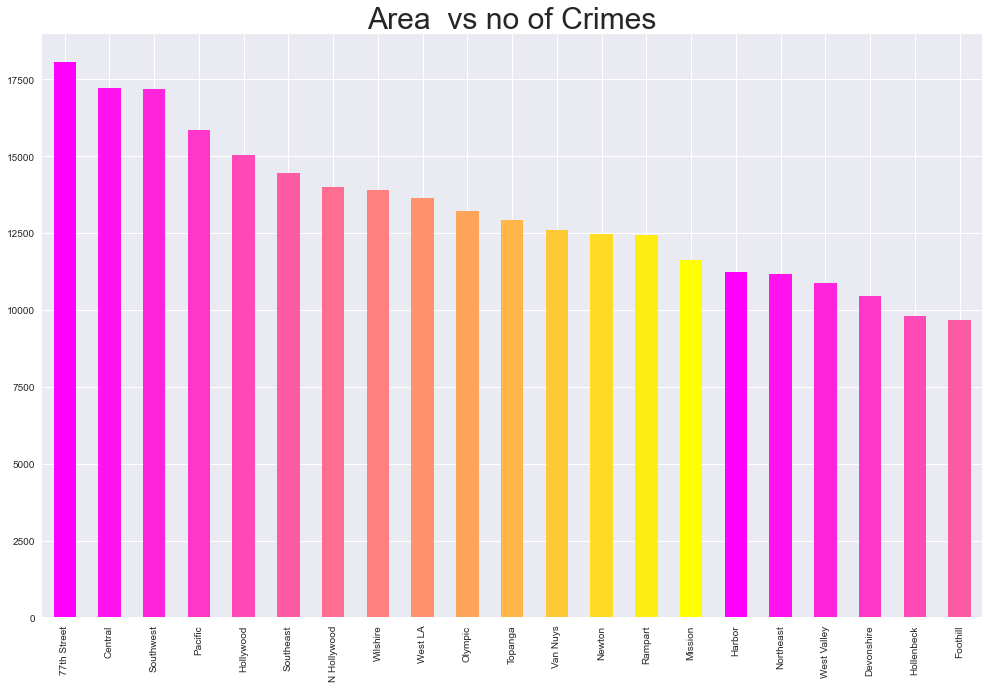

In [42]:
#Regions with count of crimes
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('seaborn')
color = plt.cm.spring(np.linspace(0, 1, 15))
df['AREA NAME'].value_counts().plot.bar(color = color, figsize = (15, 10))
plt.title('Area  vs no of Crimes',fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

   ## At what Day the crime rate is high 

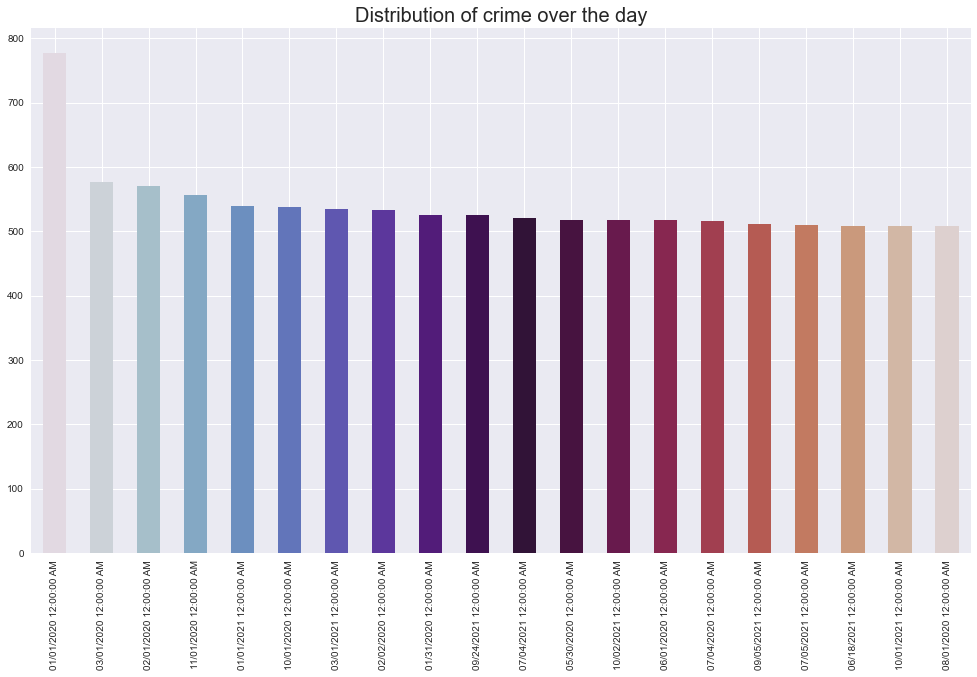

In [43]:
import warnings
warnings.filterwarnings('ignore')

color = plt.cm.twilight(np.linspace(0, 5, 100))
df['DATE OCC'].value_counts().head(20).plot.bar(color = color, figsize = (15, 9))

plt.title('Distribution of crime over the day', fontsize = 20)
plt.show()
# crime happend based on day and month

## Age category of people participated in crimes

<AxesSubplot:ylabel='Status Desc'>

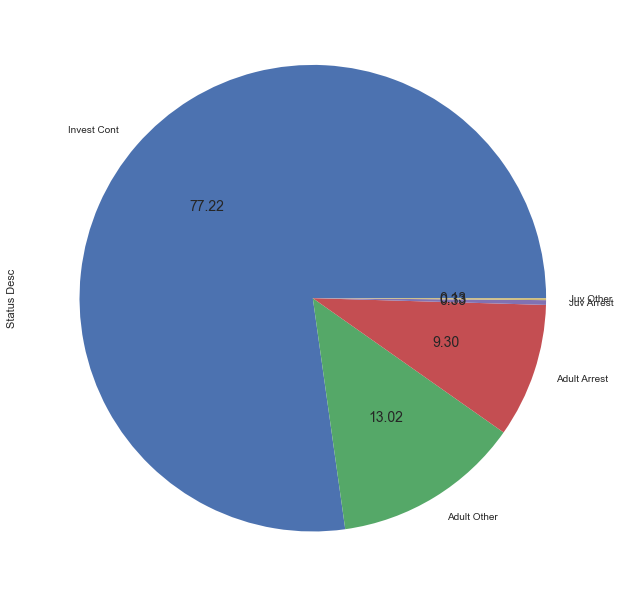

In [44]:
df['Status Desc'].value_counts().plot(kind = 'pie',autopct='%.2f',figsize=(30,10))

## percentage of victims based on age group


## Hypothesis 2: Can this dataset provide the age category of the people involved in the crime.

### Here we are describing the  percentage of victims age in a pie chart 

<AxesSubplot:ylabel='Vict Age'>

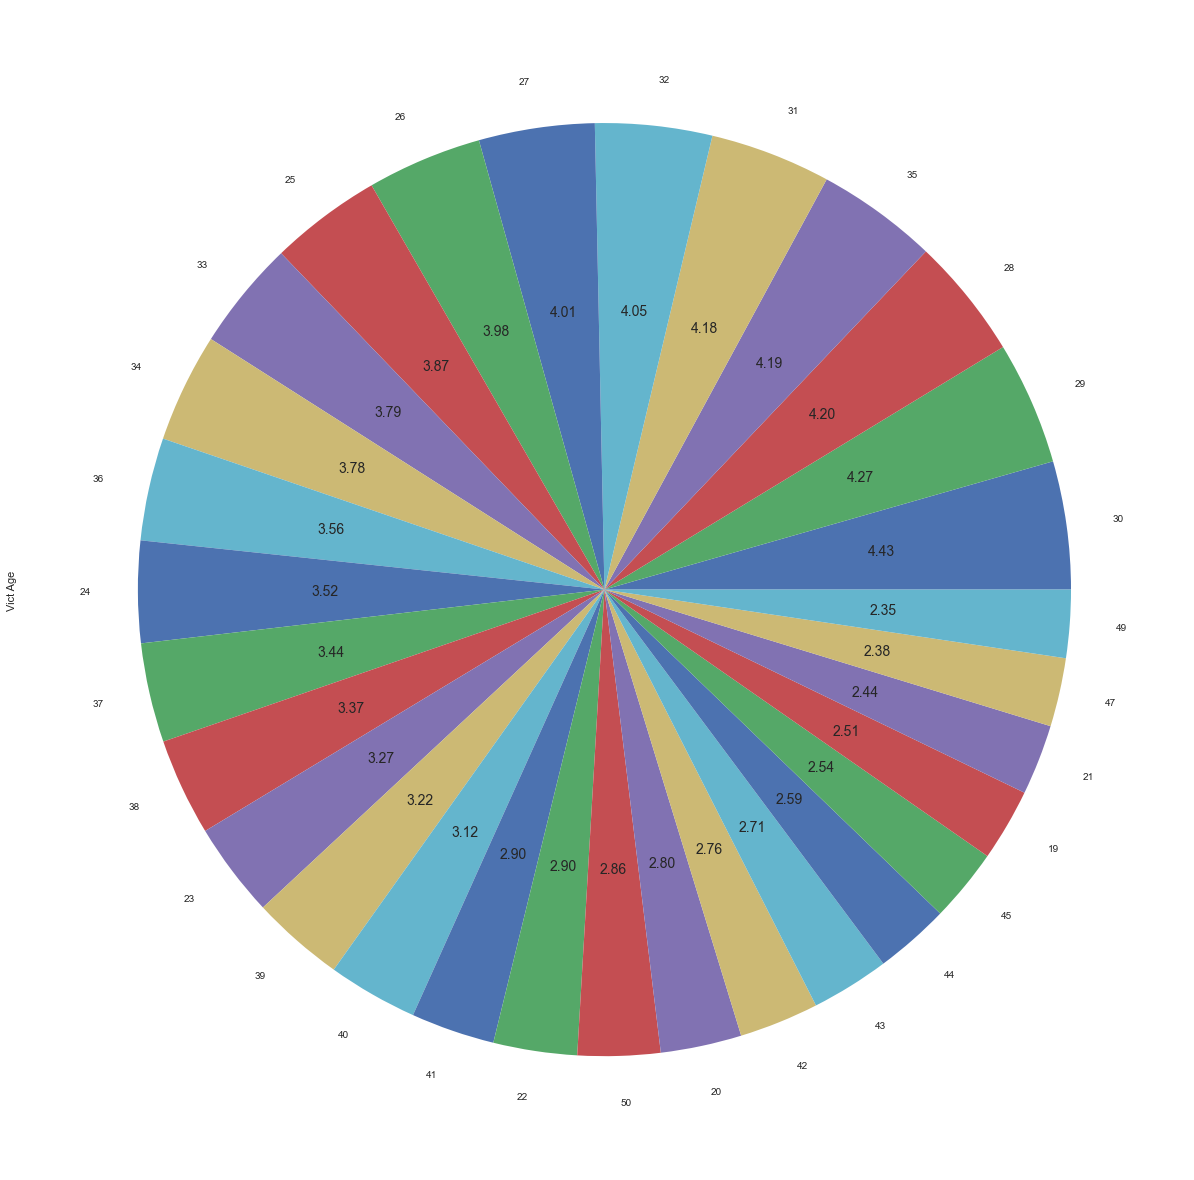

In [45]:
df['Vict Age'].value_counts().head(30).plot(kind = 'pie',autopct='%.2f',figsize=(20,20))

In [46]:
df1=df.groupby(['Crm Cd Desc']).first()

In [47]:
locations = df1[["LAT", "LON", "AREA NAME"]]

In [48]:
map = folium.Map(location1=[df1.LAT.mean(), df1.LON.mean()], zoom_start=26, control_scale=True)

In [49]:
for index, location_info in df1.iterrows():
    folium.Marker([location_info["LAT"], location_info["LON"]], popup=location_info["AREA NAME"]).add_to(map)

## location where the high rate of Crime happend in Los Angles

In [50]:
map

In [51]:
#df['Vict Age'].describe()